## Import Libraries

In [32]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Read Data from data frame

In [29]:
dataset = pd.read_pickle("./plank_data_frame")
dataset = dataset.replace(r'\\n',' ', regex=True)
dataset['label'] = dataset['label'].astype(int)

dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,filename,label
1,110.0,22.0,114.0,40.0,108.0,38.0,88.0,50.0,86.0,30.0,...,110.0,18.0,114.0,20.0,NaN,NaN,124.0,24.0,7_20-42-03.096,2
2,142.0,8.0,148.0,20.0,142.0,18.0,124.0,22.0,124.0,12.0,...,140.0,6.0,146.0,6.0,NaN,NaN,154.0,8.0,56_20-35-04.885,2
3,134.0,10.0,146.0,26.0,148.0,26.0,142.0,56.0,130.0,68.0,...,NaN,NaN,136.0,8.0,NaN,NaN,144.0,10.0,42_18-16-56.450,2
4,188.0,26.0,178.0,50.0,174.0,50.0,214.0,62.0,216.0,30.0,...,180.0,22.0,188.0,20.0,168.0,28.0,NaN,NaN,75_22-20-57.517,1
5,86.0,22.0,92.0,38.0,96.0,38.0,72.0,40.0,68.0,28.0,...,NaN,NaN,88.0,20.0,NaN,NaN,94.0,24.0,66_11-27-03.373,1


### Data descriptions

1. The last columns represent the label of each image:
    - 0: Back too low
    - 1: Correct form
    - 2: Back too high
1. ...

In [13]:
# Split dataset
dataset = dataset.values
X = dataset[:, 0:36]
Y = dataset[:, 37]
Y = Y.astype(int)

### Data processing

In [14]:
# Feature Scaling (all values between 0.0 and 1.0) and NaN to 0
sc = StandardScaler()
X = sc.fit_transform(X)
X = np.nan_to_num(X)

In [15]:
# one hot encoding of labels
# One-hot encoding -> https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
onehot_encoder = OneHotEncoder(sparse=False)
Y = Y.reshape(len(Y), 1)
Y = onehot_encoder.fit_transform(Y)

In [16]:
# split in train / test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, shuffle=True)

## Training model

In [17]:
# create model
model = Sequential()
model.add(Dense(36, input_dim=36, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(3, activation='softmax'))  # we use Softmax, so the outputs represent accuracies that add up to 1

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

2022-09-13 15:21:00.909053: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-13 15:21:00.909765: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-13 15:21:01.116678: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/100


2022-09-13 15:21:01.348312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


464/464 [==============================] - ETA: 0s - loss: 0.8026 - accuracy: 0.6440

2022-09-13 15:21:07.516511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


464/464 [==============================] - 8s 11ms/step - loss: 0.8026 - accuracy: 0.6440 - val_loss: 0.7315 - val_accuracy: 0.6801
Epoch 2/100
464/464 [==============================] - 5s 11ms/step - loss: 0.6637 - accuracy: 0.7283 - val_loss: 0.6311 - val_accuracy: 0.7519
Epoch 3/100
464/464 [==============================] - 5s 11ms/step - loss: 0.5813 - accuracy: 0.7733 - val_loss: 0.5780 - val_accuracy: 0.7707
Epoch 4/100
464/464 [==============================] - 5s 10ms/step - loss: 0.5370 - accuracy: 0.7908 - val_loss: 0.5156 - val_accuracy: 0.8018
Epoch 5/100
464/464 [==============================] - 5s 10ms/step - loss: 0.5014 - accuracy: 0.8113 - val_loss: 0.5151 - val_accuracy: 0.7917
Epoch 6/100
464/464 [==============================] - 5s 10ms/step - loss: 0.4812 - accuracy: 0.8154 - val_loss: 0.4884 - val_accuracy: 0.8053
Epoch 7/100
464/464 [==============================] - 5s 11ms/step - loss: 0.4570 - accuracy: 0.8247 - val_loss: 0.4781 - val_accuracy: 0.8166
Epoc

### Evaluate model

In [18]:
eval_model = model.evaluate(X_train, y_train)
eval_model

145/145 [==============================] - 1s 6ms/step - loss: 0.2233 - accuracy: 0.9140


[0.22329846024513245, 0.9139530062675476]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


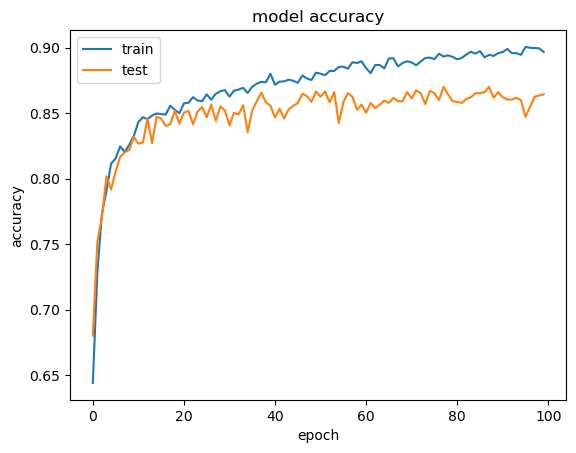

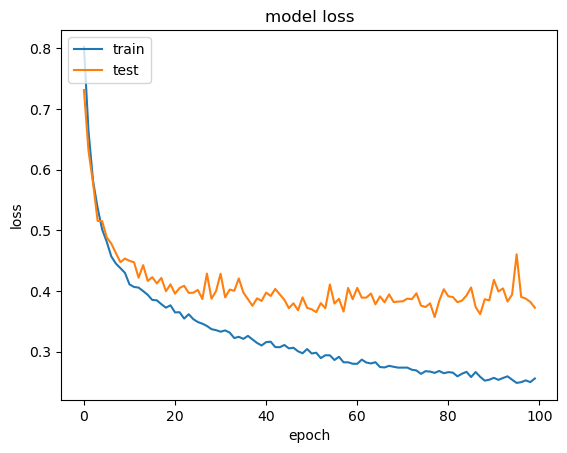

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
y_pred = model.predict(X_test)

# Transform prediction from float number (probability) to True, False
# If prob > 50%, that is what the model predicted
y_pred = y_pred > 0.5

y_pred.shape, y_pred

72/72 [==============================] - 0s 2ms/step


((2285, 3),
 array([[ True, False, False],
        [False,  True, False],
        [False, False,  True],
        ...,
        [ True, False, False],
        [False,  True, False],
        [False,  True, False]]))

In [26]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[193  35   1]
 [ 37 984  97]
 [  5 138 795]]


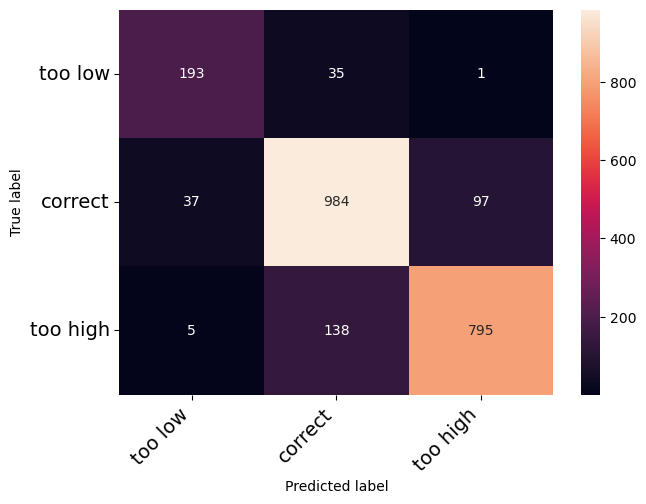

In [34]:
def print_confusion_matrix(confusion_matrix, class_names, figsize=(7, 5), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# define confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print_confusion_matrix(cm, ['too low', 'correct', 'too high'])